# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# Create two variables called `my_btc` and `my_eth`. Set them equal to `1.2` and `5.3`, respectively.
my_btc = 1.2
my_eth = 5.3
# YOUR CODE HERE!

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
# Fetch current BTC price
my_btc_value = requests.get(btc_url).json()
btc_price = my_btc_value['data']['1']['quotes']['USD']['price']
#print(json.dumps(my_btc_value, indent=4))

# Fetch current ETH price
my_eth_value = requests.get(eth_url).json()
eth_price = my_eth_value['data']['1027']['quotes']['USD']['price'] 
#print(json.dumps(my_eth_value, indent=4))
# YOUR CODE HERE!

# Compute current value of my crpto
btc_val = btc_price * my_btc
eth_val = eth_price * my_eth
my_crypto_val = (btc_val) + (eth_val)

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${btc_val:0.2f}")
print(f"The current value of your {my_eth} ETH is ${eth_val:0.2f}")

The current value of your 1.2 BTC is $38944.80
The current value of your 5.3 ETH is $10790.80


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2020-07-21", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    limit = 1000
).df


# Preview DataFrame
df_portfolio.head()

AGG                                         SPY  \
                             open    high       low   close    volume    open   
time                                                                            
2020-07-21 00:00:00-04:00  119.10  119.10  119.0100  119.05   4459705  326.45   
2020-07-22 00:00:00-04:00  119.22  119.27  119.1100  119.18   9385338  324.62   
2020-07-23 00:00:00-04:00  119.35  119.38  119.2517  119.36  16050123  326.47   
2020-07-24 00:00:00-04:00  119.26  119.41  119.1900  119.29  20881682  320.95   
2020-07-27 00:00:00-04:00  119.40  119.42  119.1500  119.18   3849240  321.63   

                                                                
                             high      low    close     volume  
time                                                            
2020-07-21 00:00:00-04:00  326.93  323.940  324.960   49155550  
2020-07-22 00:00:00-04:00  327.20  324.500  326.820   76092164  
2020-07-23 00:00:00-04:00  327.23  321.720  322.935   81505661  
2020-07-24 00:00:00-04:00  321.99  319.246  320.860  117984836  
2020-07-27 00:00:00-04:00  323.41  320.775  323.180   42586195

In [9]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio['AGG']['close'][0]
spy_close_price = df_portfolio['SPY']['close'][0]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $119.05
Current SPY closing price: $324.96


In [10]:
# Compute the current value of shares
#my_agg = 200
#my_spy = 50

my_agg_value = agg_close_price * 200
my_spy_value = spy_close_price * 50

# Print current value of shares
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")


The current value of your 200 AGG shares is $23810.00
The current value of your 50 SPY shares is $16248.00


### Savings Health Analysis

In [84]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
savings_data = [btc_val + eth_val, my_agg_value + my_spy_value]

# Create savings DataFrame
df_savings = pd.DataFrame(savings_data, columns=["amount"], index=["crypto", "shares"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,49735.6
shares,40058.0


<AxesSubplot:ylabel='amount'>

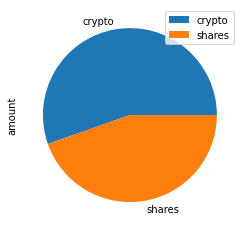

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y = "amount")

In [86]:
savings_data = 49735.6 + 40058


In [88]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
if savings_data >= emergency_fund: #If total savings are greater than the emergency fund
    print("Congratulations! You have enough money in your emergency fund.")
elif savings_data <= emergency_fund: #If total savings are less than the emergency fund, display a message showing how many dollars away the person is from reaching the goal.
    print("Bad news, you missed your goal") 
elif savings_data == emergency_fund:
    print("You have enough money")

# Validate saving health
print(f"Congratulations! You have enough money in your emergency fund.")

Congratulations! You have enough money in your emergency fund.
Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [19]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-07-21', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-07-21', tz='America/New_York').isoformat()

In [21]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 5 years ago.
start_date = pd.Timestamp("2015-07-21", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-07-21", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ["SPY","AGG"]

# Get 5 year's worth of historical price data
df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
df_ticker.head()

# Display sample data
#df_stock_data.head()

AGG                                       \
                             open      high      low    close   volume   
time                                                                     
2016-08-01 00:00:00-04:00  112.50  112.6780  112.470  112.540  2956580   
2016-08-02 00:00:00-04:00  112.36  112.4599  112.190  112.230  3252089   
2016-08-03 00:00:00-04:00  112.31  112.3600  112.100  112.330  3249520   
2016-08-04 00:00:00-04:00  112.54  112.6600  112.500  112.555  1768667   
2016-08-05 00:00:00-04:00  112.54  112.5400  112.135  112.170  2299946   

                              SPY                                      
                             open     high      low   close    volume  
time                                                                   
2016-08-01 00:00:00-04:00  217.19  217.650  216.405  216.89  59329540  
2016-08-02 00:00:00-04:00  216.65  216.830  214.570  215.55  72796484  
2016-08-03 00:00:00-04:00  215.48  216.245  215.130  216.21  41852984  
2016-08-04 00:00:00-04:00  216.30  216.780  214.250  216.41  38363982  
2016-08-05 00:00:00-04:00  217.21  218.230  217.070  218.17  48577434

In [22]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_forecast = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.60,.40],
    num_simulation = 1000,
    num_trading_days = 252*30
)

In [23]:
# Printing the simulation input data
MC_30_forecast.portfolio_data.head()

AGG                                       \
                             open      high      low    close   volume   
time                                                                     
2016-08-01 00:00:00-04:00  112.50  112.6780  112.470  112.540  2956580   
2016-08-02 00:00:00-04:00  112.36  112.4599  112.190  112.230  3252089   
2016-08-03 00:00:00-04:00  112.31  112.3600  112.100  112.330  3249520   
2016-08-04 00:00:00-04:00  112.54  112.6600  112.500  112.555  1768667   
2016-08-05 00:00:00-04:00  112.54  112.5400  112.135  112.170  2299946   

                                           SPY                            \
                          daily_return    open     high      low   close   
time                                                                       
2016-08-01 00:00:00-04:00          NaN  217.19  217.650  216.405  216.89   
2016-08-02 00:00:00-04:00    -0.002755  216.65  216.830  214.570  215.55   
2016-08-03 00:00:00-04:00     0.000891  215.48  216.245  215.130  216.21   
2016-08-04 00:00:00-04:00     0.002003  216.30  216.780  214.250  216.41   
2016-08-05 00:00:00-04:00    -0.003421  217.21  218.230  217.070  218.17   

                                                  
                             volume daily_return  
time                                              
2016-08-01 00:00:00-04:00  59329540          NaN  
2016-08-02 00:00:00-04:00  72796484    -0.006178  
2016-08-03 00:00:00-04:00  41852984     0.003062  
2016-08-04 00:00:00-04:00  38363982     0.000925  
2016-08-05 00:00:00-04:00  48577434     0.008133

In [27]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_forecast = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.60,.40],
    num_simulation = 1000,
    num_trading_days = 252*30
)

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

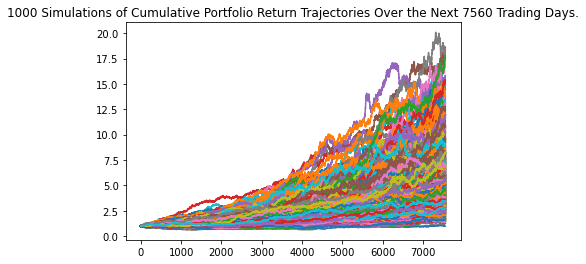

In [28]:
# Plot simulation outcomes
line_plot = MC_30_forecast.plot_simulation()

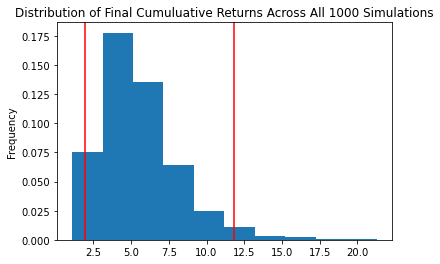

In [26]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30_forecast.plot_distribution()

### Retirement Analysis

In [33]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = MC_30_forecast.summarize_cumulative_return()

# Print summary statistics
print(summary_stats)

count           1000.000000
mean               5.615427
std                2.727337
min                0.991069
25%                3.681824
50%                5.114344
75%                7.002628
max               18.605533
95% CI Lower       1.822481
95% CI Upper      12.446958
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [36]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
invest_ci_lower = round(summary_stats[8]*20000,2)
invest_ci_upper = round(summary_stats[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${invest_ci_lower} to ${invest_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $36449.63 to $248939.17


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [40]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
thirty_ci_lower = round(summary_stats[8]*30000,2)
thirty_ci_upper = round(summary_stats[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${thirty_ci_lower} and ${thirty_ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $54674.44 and $373408.75


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [41]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_forecast = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.60,.40],
    num_simulation = 1000,
    num_trading_days = 252*5
)

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

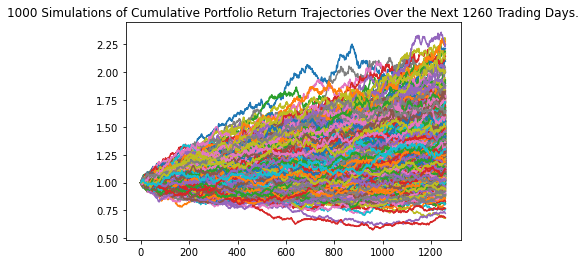

In [42]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
line_plot = MC_5_forecast.plot_simulation()

In [47]:
# Plot simulation outcomes
new_summary_stats = MC_5_forecast.summarize_cumulative_return()
print(new_summary_stats)

count           1000.000000
mean               1.328091
std                0.258008
min                0.678886
25%                1.141693
50%                1.307083
75%                1.486263
max                2.290649
95% CI Lower       0.895086
95% CI Upper       1.883889
Name: 1260, dtype: float64


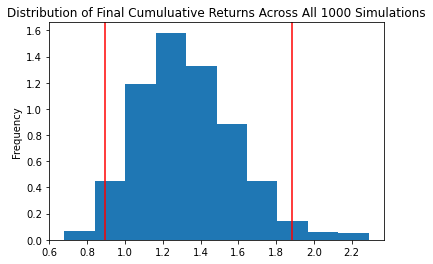

In [48]:
# Plot probability distribution and confidence intervals
fiveyr_dist_plot = MC_5_forecast.plot_distribution()

In [49]:
# Fetch summary statistics from the Monte Carlo simulation results
new_summary_stats = MC_5_forecast.summarize_cumulative_return()
print(new_summary_stats)

count           1000.000000
mean               1.328091
std                0.258008
min                0.678886
25%                1.141693
50%                1.307083
75%                1.486263
max                2.290649
95% CI Lower       0.895086
95% CI Upper       1.883889
Name: 1260, dtype: float64


In [50]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(new_summary_stats[8]*60000,2)
ci_upper_five = round(new_summary_stats[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $53705.17 and $113033.31


### Ten Years Retirement Option

In [58]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_forecast = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.60,.40],
    num_simulation = 1000,
    num_trading_days = 252*10
)

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

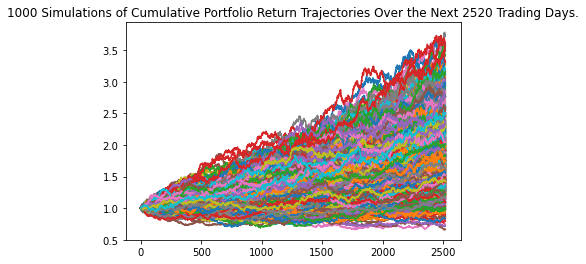

In [59]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
line_plot = MC_10_forecast.plot_simulation()

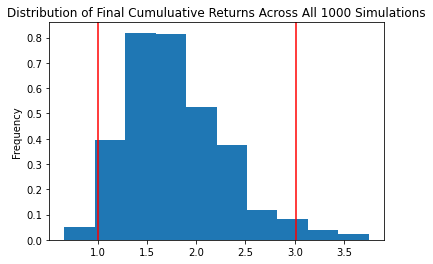

In [60]:
# Plot probability distribution and confidence intervals
tenyr_dist_plot = MC_10_forecast.plot_distribution()

In [61]:
# Fetch summary statistics from the Monte Carlo simulation results
new10_summary_stats = MC_10_forecast.summarize_cumulative_return()
print(new10_summary_stats)

# Print summary statistics

count           1000.000000
mean               1.790077
std                0.509288
min                0.661804
25%                1.412980
50%                1.733817
75%                2.082447
max                3.750049
95% CI Lower       0.998587
95% CI Upper       3.014904
Name: 2520, dtype: float64


In [62]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(new_summary_stats[8]*60000,2)
ci_upper_ten = round(new_summary_stats[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $53705.17 and $113033.31
